In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/train.csv')
test=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/test.csv')
submission=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/sample_submission.csv')

In [7]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
train.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)

<Axes: >

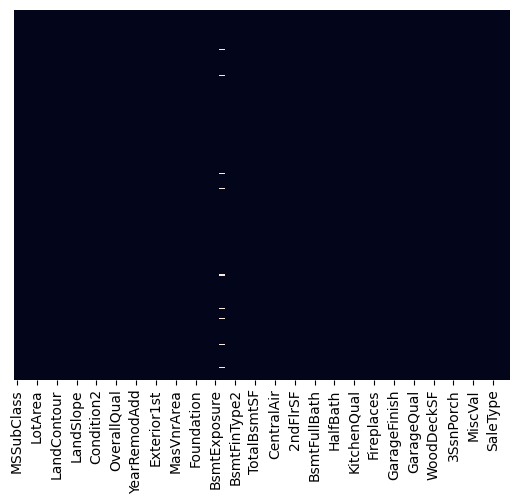

In [21]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [22]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

<Axes: >

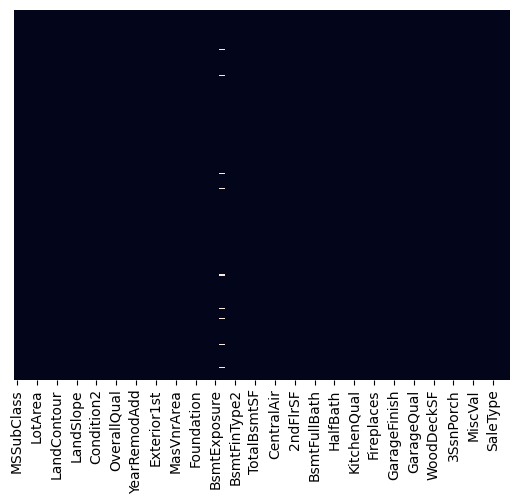

In [23]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [25]:
train.dropna(inplace=True)

In [14]:
len(train)

1422

<Axes: >

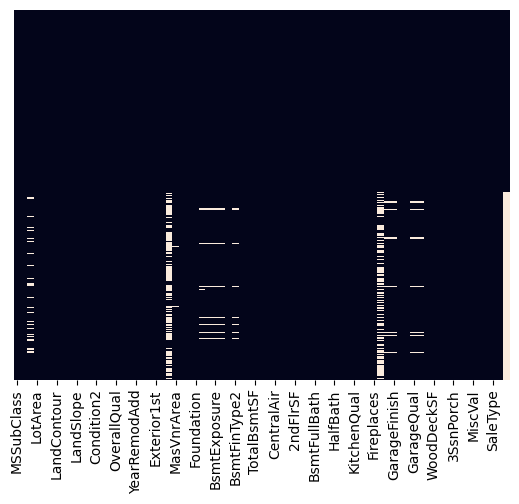

In [29]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False)

In [26]:
len(test)

1459

In [27]:
final=pd.concat([train, test], axis=0)

In [28]:
len(final)

2881

In [57]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2881 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2881 non-null   int64  
 1   MSZoning       2877 non-null   object 
 2   LotFrontage    2881 non-null   float64
 3   LotArea        2881 non-null   int64  
 4   Street         2881 non-null   object 
 5   LotShape       2881 non-null   object 
 6   LandContour    2881 non-null   object 
 7   Utilities      2879 non-null   object 
 8   LotConfig      2881 non-null   object 
 9   LandSlope      2881 non-null   object 
 10  Neighborhood   2881 non-null   object 
 11  Condition1     2881 non-null   object 
 12  Condition2     2881 non-null   object 
 13  BldgType       2881 non-null   object 
 14  HouseStyle     2881 non-null   object 
 15  OverallQual    2881 non-null   int64  
 16  OverallCond    2881 non-null   int64  
 17  YearBuilt      2881 non-null   int64  
 18  YearRemodAdd 

In [58]:
final.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [60]:
final.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)

In [22]:
final.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

<Axes: >

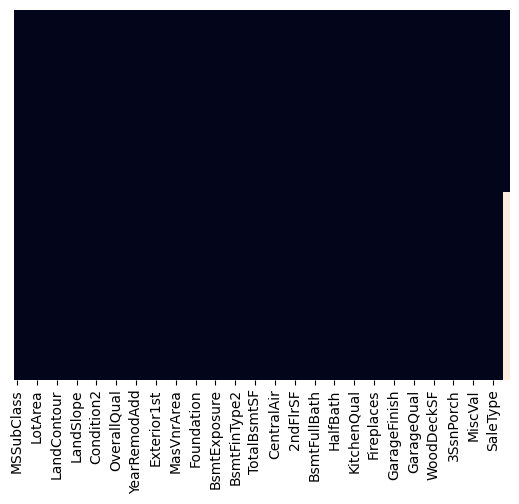

In [61]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False)

In [62]:
final['BsmtFinSF1']=final['BsmtFinSF1'].fillna(final['BsmtFinSF1'].mean())
final['BsmtFinSF2']=final['BsmtFinSF2'].fillna(final['BsmtFinSF2'].mean())
final['BsmtFinType1']=final['BsmtFinType1'].fillna(final['BsmtFinType1'].mode()[0])
final['BsmtUnfSF']=final['BsmtUnfSF'].fillna(final['BsmtUnfSF'].mean())
final['TotalBsmtSF']=final['TotalBsmtSF'].fillna(final['TotalBsmtSF'].mean())

<Axes: >

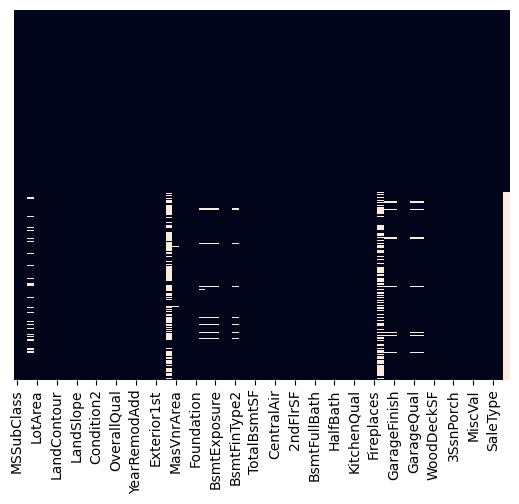

In [27]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False)

In [63]:
final['LotFrontage']=final['LotFrontage'].fillna(final['LotFrontage'].mean())
final['BsmtCond']=final['BsmtCond'].fillna(final['BsmtCond'].mode()[0])
final['BsmtQual']=final['BsmtQual'].fillna(final['BsmtQual'].mode()[0])
final['FireplaceQu']=final['FireplaceQu'].fillna(final['FireplaceQu'].mode()[0])
final['GarageType']=final['GarageType'].fillna(final['GarageType'].mode()[0])
final['GarageFinish']=final['GarageFinish'].fillna(final['GarageFinish'].mode()[0])
final['GarageQual']=final['GarageQual'].fillna(final['GarageQual'].mode()[0])
final['GarageCond']=final['GarageCond'].fillna(final['GarageCond'].mode()[0])
final['MasVnrType']=final['MasVnrType'].fillna(final['MasVnrType'].mode()[0])
final['MasVnrArea']=final['MasVnrArea'].fillna(final['MasVnrArea'].mode()[0])
final['BsmtExposure']=final['BsmtExposure'].fillna(final['BsmtExposure'].mode()[0])
final['BsmtFinType2']=final['BsmtFinType2'].fillna(final['BsmtFinType2'].mode()[0])




<Axes: >

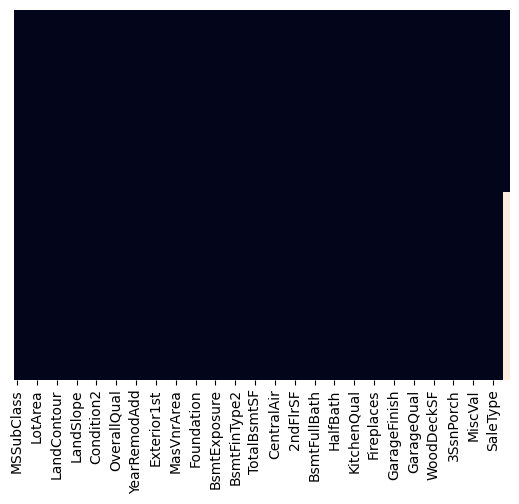

In [25]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False)

In [30]:
final.to_csv('testfinal.csv', index=False)

In [32]:
final_train_test = pd.get_dummies(final, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',                                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                                       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',                                        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                                       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])  

In [33]:
final_train_test.shape

(2881, 273)

In [65]:
final_train_test.shape


final_train_test = final_train_test.loc[:,~final_train_test.columns.duplicated()]



In [28]:
final_train_test.isnull().SalePrice

0       False
1       False
2       False
3       False
4       False
        ...  
1454     True
1455     True
1456     True
1457     True
1458     True
Name: SalePrice, Length: 2881, dtype: bool

In [66]:
m_train=final_train_test.iloc[:1422,:]
m_test=final_train_test.iloc[1422:,:]

In [30]:
m_train.shape

(1422, 273)

In [31]:
m_test.shape

(1459, 273)

In [67]:
final_train_test.to_csv('testfinal2.csv', index=False)

In [72]:

X_test=m_test.drop(['SalePrice'],axis=1)
#print('try')

In [38]:
m_test.shape

(1459, 273)

In [39]:
X_train=m_train.drop(['SalePrice'],axis=1)
y_train=m_train['SalePrice']

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<Axes: >

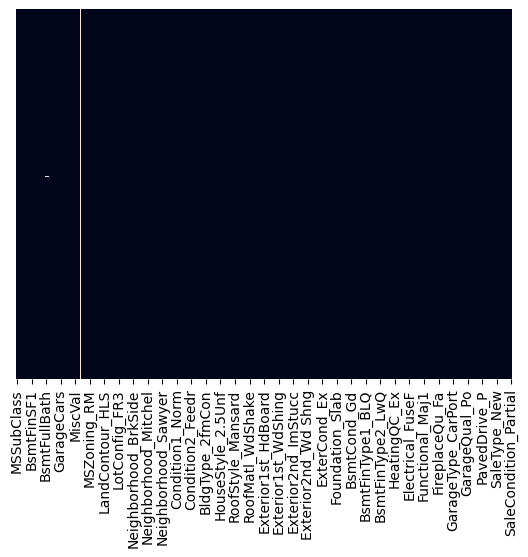

In [70]:
sns.heatmap(m_test.isnull(), yticklabels=False,cbar=False)

In [73]:
y_pred = regressor.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values